In [65]:
!pip install -U scikit-learn==1.4.2 imbalanced-learn==0.12.0

# 계획
1. 데이터셋&라이브러리 준비
2. 데이터 탐색 및 정제
3. 학습 데이터와 테스트 데이터 분리
4. 모델 선택
5. 원본데이터 학습/예측/평가
6. 데이터 스케일링 학습/예측/평가
7. 피처 엔지니어링 학습/예측/평가
8. SMOTE 오버 샘플링 학습/예측/평가
9. 앙상블 모델 학습/예측/평가
10. 하이퍼 파라미터 튜닝
11. 최종 모델 선정

# 데이터셋 & 라이브러리 준비

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [67]:
train = pd.read_csv("/kaggle/input/modu-ds-4-credit-card-fraud-detection/train.csv")
test = pd.read_csv("/kaggle/input/modu-ds-4-credit-card-fraud-detection/test.csv")

# 데이터 탐색 및 정제

In [68]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [69]:
test.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,170883,120396.0,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,...,-0.558831,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166,124.98
1,170884,120396.0,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,...,-0.807798,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516,50.00
2,170885,120396.0,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,...,0.120841,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866,8.69
3,170886,120396.0,-1.303150,0.187865,0.944395,-1.277834,1.236744,-1.301696,1.402234,-0.558914,...,-0.251346,-0.274175,-0.656826,-0.164985,0.001284,-0.001842,-0.024050,-0.436872,0.051705,59.99
4,170887,120396.0,1.947883,-1.095332,-1.392121,-0.600598,-0.320840,0.048953,-0.443486,-0.081011,...,-0.293448,-0.250594,-0.385151,0.099030,0.221922,-0.212846,0.586637,-0.071616,-0.045475,119.97


In [70]:
# 170882 를 기점으로 그 뒤 시점으로 자름

train["id"].max(), test["id"].min()

(170882, 170883)

## 데이터 확인

In [71]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113923 entries, 0 to 113922
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      113923 non-null  int64  
 1   Time    113923 non-null  float64
 2   V1      113923 non-null  float64
 3   V2      113923 non-null  float64
 4   V3      113923 non-null  float64
 5   V4      113923 non-null  float64
 6   V5      113923 non-null  float64
 7   V6      113923 non-null  float64
 8   V7      113923 non-null  float64
 9   V8      113923 non-null  float64
 10  V9      113923 non-null  float64
 11  V10     113923 non-null  float64
 12  V11     113923 non-null  float64
 13  V12     113923 non-null  float64
 14  V13     113923 non-null  float64
 15  V14     113923 non-null  float64
 16  V15     113923 non-null  float64
 17  V16     113923 non-null  float64
 18  V17     113923 non-null  float64
 19  V18     113923 non-null  float64
 20  V19     113923 non-null  float64
 21  V20     11

In [74]:
print(train.shape)
print(test.shape)  # 레이블 Class를 제외해서 컬럼 개수가 31

(170883, 32)
(113923, 31)


In [75]:
train.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,85441.000000,61091.567090,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,...,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445,87.336704,0.002107
std,49329.817362,27828.109419,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,...,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315,245.954429,0.045851
min,0.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42720.500000,41216.500000,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,...,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054,5.480000,0.000000
50%,85441.000000,60776.000000,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,...,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152,21.890000,0.000000
75%,128161.500000,78622.000000,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,...,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302,76.720000,0.000000
max,170882.000000,120396.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


**train**
- 컬럼별 정보
    - id : 고유 숫자
    - Time: 각 거래와 데이터셋의 첫 거래 사이의 경과 시간(초) -> 큰 의미가 없으므로 제거 처리
    - V1~V28: PCA로 얻은 주성분
    - Amount: 신용카드 트랜잭션 금액
    - Class: 레이블. 0_정상 / 1_사기 거래
- 결측치 없음
- id와 Classs는 int형, 그외 피처들 모두 float형 -> 범주형 데이터 존재 X. 인코딩 X
- 이상치 데이터는 제거 전/후 비교를 위해 이후 단계에서 처리 예정

## 불균형 데이터 확인

In [76]:
## Class의 0과 1비율 확인
train["Class"].value_counts(normalize=True)*100

Class
0    99.78933
1     0.21067
Name: proportion, dtype: float64

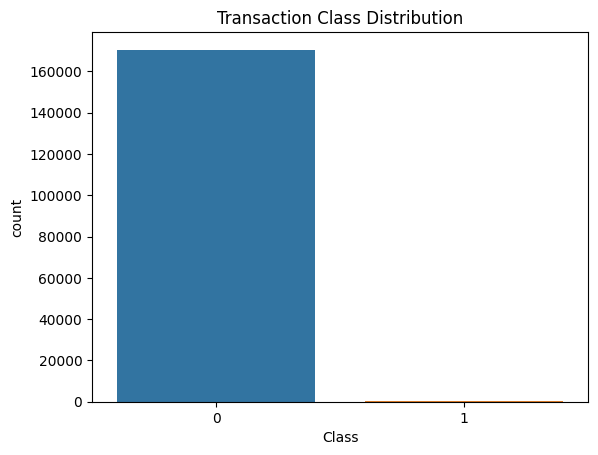

In [77]:
# 시각화로 확인해보기
sns.countplot(x='Class', data=train)
plt.title('Transaction Class Distribution')
plt.show()

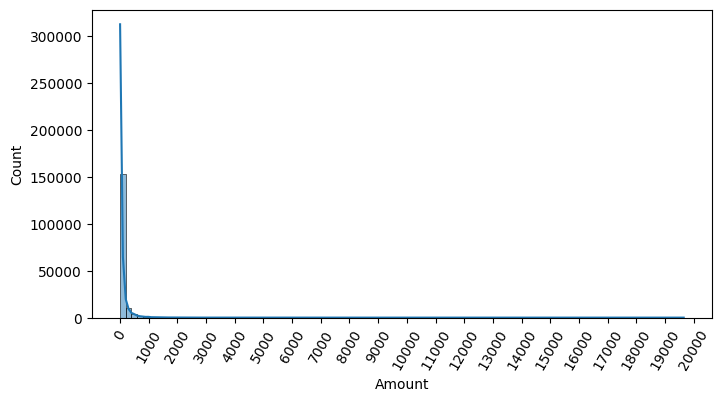

In [78]:
## Amount 확인
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(train['Amount'], bins=100, kde=True)
plt.show()

**Class**
- 이상 레이블(1) 데이터 건수가 매우 적기 때문에 원본 데이터 모델 성능과 오버 샘플링한 모델 성능 비교 필요
- SMOTE 방법을 사용하여 이상 레이블(1)의 데이터 증가시키기

**Amount**
- 1000불 이하인 데이터가 대부분이면서,약 20000불까지 드물게 많은 금액을 사용한 경우 존재
- 로그 변환을 통해 데이터 분포도의 왜곡을 개선해서 학습에 적용 필요

## 데이터 전처리

In [79]:
## 사전 데이터 처리 정의
# 우선 기본적으로 사용될 Time 컬럼 제거 먼저 정의
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

# 학습 데이터와 테스트 데이터 분리

In [80]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                        test_size=0.3, random_state=0, stratify=y_target)
    
    return X_train, X_test, y_train, y_test

In [81]:
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

In [82]:
# 학습 데이터셋과 테스트 데이터셋의 레이블 값 비율 확인
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0    99.789329
1     0.210671
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.78933
1     0.21067
Name: count, dtype: float64


# 모델 선택

**모델 선택**
1. 로지스틱 회귀
   - 속도가 빠르며 이진 분류가 목적인 해당 데이터에 적합하다고 판단
2. LightGBM
   - XGBoost에 비해 속도가 빠르며 성능도 좋음
   - 불균형 데이터를 조절할 수 있는 파라미터가 있어 불균형 분포가 특징인 해당 데이터에 적합하다고 판단
3. XGBoost
   - 기본적으로 예측 성능이 좋은 모델
   - 마찬가지로 불균형 데이터를 조절할 수 있는 파라미터가 있으며 과적합 방지가 내장되어 있어서 활용 시도


In [83]:
# 평가 함수 정의

def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision: .4f}, 재현율: {recall: .4f}, f1스코어: {f1:.4f}, roc-auc: {roc_auc:.4f}")

In [84]:
# 모델 학습 함수 정의
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

# 원본 데이터 학습/예측/평가

In [85]:
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

In [86]:
print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, verbose=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### XGBoost 예측 성능 ###')
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='auc',
                       scale_pos_weight=476, use_label_encoder=False)
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[51140    17]
 [   40    68]]
정확도: 0.9989, 정밀도:  0.8000, 재현율:  0.6296, f1스코어: 0.7047, roc-auc: 0.9576
### LightGBM 예측 성능 ###
오차 행렬
[[51152     5]
 [   18    90]]
정확도: 0.9996, 정밀도:  0.9474, 재현율:  0.8333, f1스코어: 0.8867, roc-auc: 0.9739
### XGBoost 예측 성능 ###
오차 행렬
[[51144    13]
 [   17    91]]
정확도: 0.9994, 정밀도:  0.8750, 재현율:  0.8426, f1스코어: 0.8585, roc-auc: 0.9718


# 데이터 스케일링 학습/예측/평가
- Amount 피처의 값을 로그로 변환하여 모델 학습

In [87]:
# 데이터 전처리 함수에 로그 변환 추가
def get_preprocessed_df(df=None, train=True):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy["Amount"])
    df_copy.insert(0, "Amount_Scaled", amount_n)
    df_copy.drop(["Time", "Amount"], axis=1, inplace=True)
    return df_copy

In [88]:
# 모델 학습/예측/평가
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### XGBoost 예측 성능 ###')
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[51145    12]
 [   44    64]]
정확도: 0.9989, 정밀도:  0.8421, 재현율:  0.5926, f1스코어: 0.6957, roc-auc: 0.9642
### LightGBM 예측 성능 ###
오차 행렬
[[51151     6]
 [   18    90]]
정확도: 0.9995, 정밀도:  0.9375, 재현율:  0.8333, f1스코어: 0.8824, roc-auc: 0.9722
### XGBoost 예측 성능 ###
오차 행렬
[[51143    14]
 [   17    91]]
정확도: 0.9994, 정밀도:  0.8667, 재현율:  0.8426, f1스코어: 0.8545, roc-auc: 0.9729


# 피처 엔지니어링 학습/예측/평가
- 이상치 데이터 제거 후 모델 학습

<Axes: >

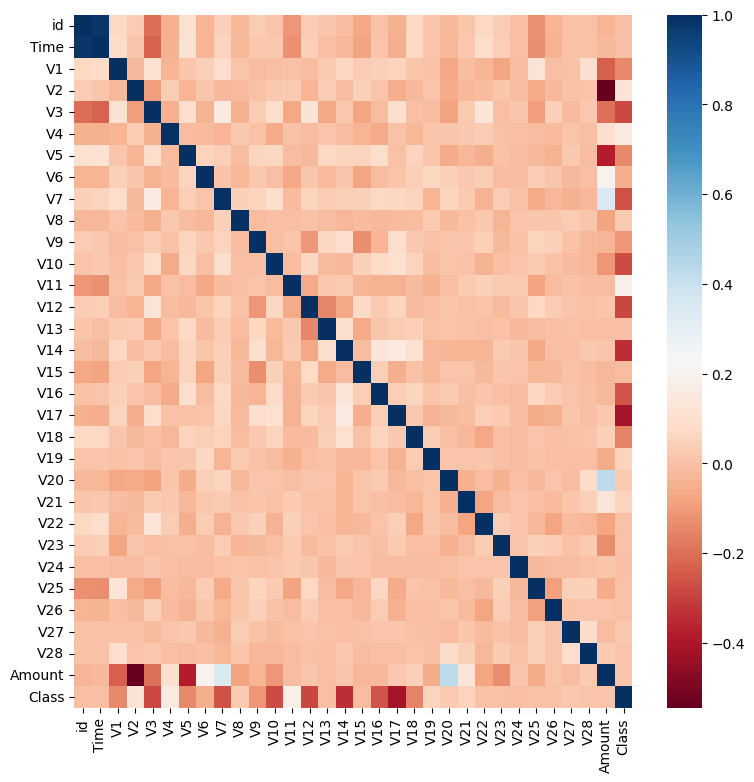

In [89]:
## 피처별 상관도 확인
# 매우 많은 피처에 이상치(IQR 기준)가 있을 경우, 레이블과 가장 상관성이 높은 피처들을 위주로 이상치를 검출
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = train.corr()
sns.heatmap(corr, cmap='RdBu')

- Class와 음의 상관관계 최고치: V14, V17
- IQR을 이용하여 이상치 검출하고 삭제

In [90]:
# IQR을 이용하여 이상치 검출하는 함수 생성
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df["Class"]==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [91]:
# V14, V17 이상치 확인
outlier_index = get_outlier(df=train, column='V14', weight=1.5)
print('V14 이상치 데이터 인덱스:', outlier_index)

outlier_index = get_outlier(df=train, column='V17', weight=1.5)
print('V17 이상치 데이터 인덱스:', outlier_index)

V14 이상치 데이터 인덱스: Index([8296, 8615, 9035], dtype='int64')
V17 이상치 데이터 인덱스: Index([], dtype='int64')


V17은 이상치 데이터가 없으므로 V14에 대한 이상치 제거 진행

In [92]:
# 데이터 전처리를 V14 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None, train=True):
   df_copy = df.copy()
   amount_n = np.log1p(df_copy["Amount"])
   df_copy.insert(0, "Amount_Scaled", amount_n)
   df_copy.drop(["Time", "Amount"], axis=1, inplace=True)
    
   outlier_index = get_outlier(df=df_copy, column="V14", weight=1.5)
   df_copy.drop(outlier_index, axis=0, inplace=True)
    
   return df_copy

In [93]:
# 모델 학습/예측/평가
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### XGBoost 예측 성능 ###')
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[51146    11]
 [   42    65]]
정확도: 0.9990, 정밀도:  0.8553, 재현율:  0.6075, f1스코어: 0.7104, roc-auc: 0.9376
### LightGBM 예측 성능 ###
오차 행렬
[[51153     4]
 [   18    89]]
정확도: 0.9996, 정밀도:  0.9570, 재현율:  0.8318, f1스코어: 0.8900, roc-auc: 0.9769
### XGBoost 예측 성능 ###
오차 행렬
[[51146    11]
 [   15    92]]
정확도: 0.9995, 정밀도:  0.8932, 재현율:  0.8598, f1스코어: 0.8762, roc-auc: 0.9778


# SMOTE 오버 샘플링 학습/예측/평가
- SMOTE를 적용할 때는 반드시 학습 데이터셋에만 오버 샘플링을 해야 함

In [94]:
# SMOTE 객체의 fit_resample() 메서드 이용하여 증식
smote = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [95]:
# 데이터 증식 전/후 비교
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ", X_train.shape, y_train.shape)
print("\nSMOTE 적용 후 학습용 피처/레이블 데이터 세트: ", X_train_over.shape, y_train_over.shape)
print("\nSMOTE 적용 후 레이블 값 분포: \n", pd.Series(y_train_over).value_counts(normalize=True))

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (119616, 30) (119616,)

SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (238732, 30) (238732,)

SMOTE 적용 후 레이블 값 분포: 
 Class
0    0.5
1    0.5
Name: proportion, dtype: float64


- 데이터 증식하여 Class의 0과 1의 값 비율이 동일하게 완료된 점 확인

In [ ]:
# 모델 학습/예측/평가
# X_train_over와 y_train_over로 변수 변경 적용 
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

print('### XGBoost 예측 성능 ###')
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='auc',
                       use_label_encoder=False) # scale_pos_weight=476 불균형 대응 옵션 제거
get_model_train_eval(xgb_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[50567   590]
 [   14    93]]
정확도: 0.9882, 정밀도:  0.1362, 재현율:  0.8692, f1스코어: 0.2354, roc-auc: 0.9725
### LightGBM 예측 성능 ###
오차 행렬
[[51146    11]
 [   17    90]]
정확도: 0.9995, 정밀도:  0.8911, 재현율:  0.8411, f1스코어: 0.8654, roc-auc: 0.9793
### XGBoost 예측 성능 ###
오차 행렬
[[51115    42]
 [   15    92]]
정확도: 0.9989, 정밀도:  0.6866, 재현율:  0.8598, f1스코어: 0.7635, roc-auc: 0.9858


- 재현율과 ROC-AUC는 모두 상승
- 그러나 정밀도와 F1 score는 하락
- SMOTE는 방식은 정밀도는 낮아도 되고, 재현율을 높이고 싶은 경우 사용하기에 가장 적합할 것으로 판단

# 앙상블 모델 학습/예측/평가

In [97]:
from sklearn.ensemble import VotingClassifier
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

# 개별 모델 정의
lr_clf = LogisticRegression(max_iter=1000)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, verbose=-1)
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='auc',
                       scale_pos_weight=476, use_label_encoder=False)

# 보팅 앙상블
voting_clf = VotingClassifier(
    estimators=[('lr', lr_clf),
               ('lgbm', lgbm_clf),
               ('xgb', xgb_clf)],
    voting='soft'
)

# 학습
voting_clf.fit(X_train, y_train)

# 예측
pred = voting_clf.predict(X_test)
pred_proba = voting_clf.predict_proba(X_test)[:, 1]  # ROC-AUC

# 평가 함수 적용
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[51152     5]
 [   17    90]]
정확도: 0.9996, 정밀도:  0.9474, 재현율:  0.8411, f1스코어: 0.8911, roc-auc: 0.9697


3개의 앙상블 모델이 더 성능을 향상시켰다고는 보기 어려움

# 하이퍼파라미터 튜닝
- 원본데이터에서 데이터 로그 변환 + 이상치 제거한 후의 LightGBM과 XGBoost의 성능이 좋은 것으로 보여짐
- 두 모델에 대한 하이퍼파라미터 튜닝을 진행한 후, 최종 모델 선택

## 최적의 하이퍼파라미터 검색

In [98]:
## LightGBM - 오래 걸려서 주석 처리
# from sklearn.model_selection import KFold
# from hyperopt import hp

# # 검색 공간 설정
# lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
#                      'max_depth': hp.quniform('max_depth', 100, 160, 1),
#                      'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
#                      'subsample': hp.uniform('subsample', 0.7, 1),
#                      'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
#                      }

# # 목적 함수 생성
# def objective_func(search_space):
#     lgbm_clf = LGBMClassifier(n_estimators=1000,
#                               num_leaves=int(search_space['num_leaves']),
#                               max_depth=int(search_space['max_depth']),
#                               min_child_samples=int(search_space['min_child_samples']),
#                               subsample=search_space['subsample'],
#                               learning_rate=search_space['learning_rate'],
#                               early_stopping_rounds=30, # early stopping은 30회로 설정
#                               eval_metric='auc',
#                               verbose=-1
#                               )
#     # 교차검증
#     roc_auc_list = []

#     kf = KFold(n_splits=3)
#     for tr_index, val_index in kf.split(X_train):
#         X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
#         X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

#         lgbm_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

#         score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
#         roc_auc_list.append(score)
    
#     # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
#     # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
#     return -1*np.mean(roc_auc_list)

# from hyperopt import fmin, tpe, Trials

# trials = Trials()

# # fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출
# best_lgbm = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
#             max_evals=50, # 최대 반복 횟수 지정
#             trials=trials, rstate=np.random.default_rng(seed=30))

# print('best_lgbm:', best_lgbm)

- learning_rate = 0.01080960144581896
- max_depth = 159
- min_child_samples = 99
- num_leaves = 36
- subsample = 0.7077513158736064

In [ ]:
# # XGBoost

# # 검색 공간 설정
# xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
#                     'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
#                     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
#                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
# }

# # 목표 함수 생성
# def objective_func(search_space):
#     xgb_clf = XGBClassifier(n_estimators=100,
#                             max_depth=int(search_space['max_depth']),
#                             min_child_weight=int(search_space['min_child_weight']),
#                             colsample_bytree=search_space['colsample_bytree'],
#                             learning_rate=search_space['learning_rate'],
#                             early_stopping_rounds=30,
#                             eval_metric='auc'
#                            )
#     # 교차검증 3회
#     roc_auc_list= []
    
#     kf = KFold(n_splits=3)
#     for tr_index, val_index in kf.split(X_train): 
#         X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
#         X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
#         xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)], verbose=False)
    
#         score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
#         roc_auc_list.append(score)
        
#     # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
#     # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
#     return -1 * np.mean(roc_auc_list)

# from hyperopt import fmin, tpe, Trials

# trial_val = Trials()
# best_xgb = fmin(fn=objective_func,
#             space=xgb_search_space,
#             algo=tpe.suggest,
#             max_evals=10, 
#             trials=trial_val, 
#             rstate=np.random.default_rng(seed=9))
# print('best_xgb:', best_xgb)

- max_depth = 8
- min_child_weight = 6
- colsample_bytree = 0.6659976014576663
- learning_rate = 0.1475201153968472

## 모델 학습/예측/평가
- LightGBM과 XGBoost만 진행
- 데이터스케일링+이상치 제거한 데이터 vs SMOTE 오버샘플링한 데이터 비교

In [100]:
# 데이터스케일링 + 이상치 제거
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, 
                          num_leaves=36,
                          max_depth=159,
                          min_child_samples=99,
                          subsample=0.70775,
                          learning_rate=0.01081,
                          scale_pos_weight=476,
                          eval_metric='auc',
                          n_jobs=-1, boost_from_average=False, verbose=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### XGBoost 예측 성능 ###')
xgb_clf = XGBClassifier(n_estimators=100,
                        learning_rate=0.14752,
                        max_depth=8,
                        min_child_weight=6,
                        colsample_bytree=0.66600,
                        eval_metric='auc',
                       scale_pos_weight=476, use_label_encoder=False)
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### LightGBM 예측 성능 ###
오차 행렬
[[51150     7]
 [   15    92]]
정확도: 0.9996, 정밀도:  0.9293, 재현율:  0.8598, f1스코어: 0.8932, roc-auc: 0.9790
### XGBoost 예측 성능 ###
오차 행렬
[[51145    12]
 [   15    92]]
정확도: 0.9995, 정밀도:  0.8846, 재현율:  0.8598, f1스코어: 0.8720, roc-auc: 0.9808


In [102]:
# SMOTE 오버 샘플링 데이터
print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, 
                          num_leaves=36,
                          max_depth=159,
                          min_child_samples=99,
                          subsample=0.70775,
                          learning_rate=0.01081,
                          # scale_pos_weight=476,
                          eval_metric='auc',
                          n_jobs=-1, boost_from_average=False, verbose=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

print('### XGBoost 예측 성능 ###')
xgb_clf = XGBClassifier(n_estimators=100,
                        learning_rate=0.14752,
                        max_depth=8,
                        min_child_weight=6,
                        colsample_bytree=0.66600,
                        # scale_pos_weight=476,
                        use_label_encoder=False)
get_model_train_eval(xgb_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

### LightGBM 예측 성능 ###
오차 행렬
[[51139    18]
 [   15    92]]
정확도: 0.9994, 정밀도:  0.8364, 재현율:  0.8598, f1스코어: 0.8479, roc-auc: 0.9765
### XGBoost 예측 성능 ###
오차 행렬
[[51139    18]
 [   15    92]]
정확도: 0.9994, 정밀도:  0.8364, 재현율:  0.8598, f1스코어: 0.8479, roc-auc: 0.9829


# 모델별 Score
| 데이터 가공 유형 | ML 모델 | 정확도 | 정밀도 | 재현율 | ROC-AUC |
|--------------|--------|------|-------|------|----------|
|원본 데이터| 로지스틱회귀 | 0.9989 | 0.8000 | 0.6296 | 0.9576|
|원본 데이터| LightGBM | 0.9996 | 0.9474 | 0.8333 | 0.9739 |
|원본 데이터| XGBoost | 0.9994 | 0.8750 | 0.8426 | 0.9718 |
|데이터 로그 변환| 로지스틱회귀 | 0.9989 | 0.8421 | 0.5926 | 0.9642 |
|데이터 로그 변환| LightGBM | 0.9995 | 0.9375 | 0.8333 | 0.9722 |
|데이터 로그 변환| XGBoost | 0.9994 | 0.8667 | 0.8426 | 0.9729 |
|이상치 제거| 로지스틱회귀 | 0.9990 | 0.8553 | 0.6075 | 0.9376 |
|이상치 제거| LightGBM | 0.9996 | 0.9570 | 0.8318 | 0.9769 |
|이상치 제거| XGBoost | 0.9995 | 0.8932 | 0.8598 | 0.9778 |
|SMOTE 샘플링| 로지스틱회귀 | 0.9882 | 0.1362 | 0.8692 | 0.9725 |
|SMOTE 샘플링| LightGBM | 0.9995 | 0.8911 | 0.8411 | 0.9793 |
|SMOTE 샘플링| XGBoost | 0.9989 | 0.6866 | 0.8598 | 0.9858 |
| - | 앙상블 모델 | 0.9996 | 0.9474 | 0.8411 | 0.9697 |
|이상치 제거| LightGBM(튜닝) | 0.9996 | 0.9293 | 0.8598 | 0.9790 |
|이상치 제거| XGBoost(튜닝) | 0.9995 | 0.8846 | 0.8598 | 0.9808 |
|SMOTE 샘플링| LightGBM(튜닝) | 0.9994 | 0.8364 | 0.8598 | 0.9765 |
|SMOTE 샘플링| XGBoost(튜닝) | 0.9994 | 0.8364 | 0.8598 | 0.9829 |

**평가지표**  
데이터가 굉장히 불균형한 형태이다 보니 이전에 사용했던 accuracy로만은 정확한 성능 측정이 어려움.  
accuracy뿐 아니라 다양한 평가 지표를 확인해야하는 것이 중요함.
- accuracy: 다수의 데이터인 정상 거래(0)만 잘 맞춰도 점수가 높게 측정
- precision: 이상 거래라고 예측한 것중에서 진짜 이상 거래인 비율 확인
- recall: 실제 이상 거래 중에서 모델이 맞게 잡은 비율
- F1 score: 정밀도와 재현율의 조화 평균
- ROC-AUC: 불균형 문제에서도 구분 능력을 평가하며, 임계값에 독립적인 비교 지표이기 때문에 최종 성능 평가로 사용

- SMOTE 오버 샘플링된 데이터로 하이퍼 파라미터를 찾은 것은 아니기 때문에, SMOTE 데이터의 성능도 약간 하락한 것으로 보임
- 하이퍼 파라미터를 찾는데 시간이 오래 소요되므로, 우선 현재 가장 높은 점수를 기록한 SMOTE 오버 샘플링 데이터로 학습한 1차 XGBoost로 최종 모델? -> 모델 성능 매우 떨어짐. 0.03744
- 하이퍼 파라미터 튜닝한 XGBoost로 최종 모델. 데이터 스케일링 + 이상치 데이터 학습

# 최종 제출

In [313]:
# 과적합 발생으로 하나씩 전부 다시 정의
train = pd.read_csv("/kaggle/input/modu-ds-4-credit-card-fraud-detection/train.csv")
test = pd.read_csv("/kaggle/input/modu-ds-4-credit-card-fraud-detection/test.csv")

# 170882 를 기점으로 그 뒤 시점으로 자름

train["id"].max(), test["id"].min()

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df["Class"]==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

def get_preprocessed_df(df=None, train=True):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy["Amount"])
    df_copy.insert(0, "Amount_Scaled", amount_n)
    df_copy.drop(["Time", "Amount"], axis=1, inplace=True)
    
    outlier_index = get_outlier(df=df_copy, column="V14", weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    
    return df_copy

# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                        test_size=0.3, random_state=0, stratify=y_target)
    
    return X_train, X_test, y_train, y_test

# 평가 함수

def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision: .4f}, 재현율: {recall: .4f}, f1스코어: {f1:.4f}, roc-auc: {roc_auc:.4f}")

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

smote = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [314]:
# 파라미터 재조정
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.05) 
                        
get_model_train_eval(xgb_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[50992   165]
 [   15    92]]
정확도: 0.9965, 정밀도:  0.3580, 재현율:  0.8598, f1스코어: 0.5055, roc-auc: 0.9848


In [315]:
# lgbm 함께 테스트
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, verbose=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[51146    11]
 [   17    90]]
정확도: 0.9995, 정밀도:  0.8911, 재현율:  0.8411, f1스코어: 0.8654, roc-auc: 0.9793


In [316]:
submission = pd.read_csv("/kaggle/input/modu-ds-4-credit-card-fraud-detection/sample_submission.csv")

In [317]:
test["Amount_Scaled"] = np.log1p(test["Amount"])

# # 맨 앞(0번째 위치)에 컬럼 이동 - 아래서 ValueError 발생
# col = test.pop("Amount_Scaled")         # 컬럼을 꺼내고
# test.insert(0, "Amount_Scaled", col)    # 맨 앞에 삽입

In [318]:
test.drop(["Time", "Amount"], axis=1, inplace=True)

In [319]:
print(X_train.columns)
print(test.columns)

Index(['Amount_Scaled', 'id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')
Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount_Scaled'],
      dtype='object')


In [320]:
# XGBoost는 컬럼 순서가 다르면 오류 발생해서 정렬
test = test[X_train.columns]

print(X_train.columns)
print(test.columns)

Index(['Amount_Scaled', 'id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')
Index(['Amount_Scaled', 'id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')


In [321]:
# 각 데이터 컬럼 확인
X_train.head()

,Amount_Scaled,id,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
168086,4.077537,168086,2.007390,-0.906754,-2.531306,-0.397208,1.956887,3.674065,-0.859827,0.801180,...,-1.416269,-0.498413,-0.017557,0.423003,0.001994,0.692191,0.316705,-0.297782,0.050395,-0.044658
120790,7.500944,120790,-3.626983,-5.592802,-0.914714,-0.410838,-5.208979,2.639078,5.691357,-0.503451,...,0.434038,3.923703,1.035055,0.183115,3.990605,-0.154880,1.191533,0.022764,-0.553519,0.191590
127688,3.696848,127688,1.198164,0.115922,0.328186,0.671532,-0.463145,-0.995986,0.137811,-0.255910,...,-0.264461,-0.010290,0.067928,0.178230,-0.112164,0.441026,0.519457,0.424236,-0.039989,0.017876
20736,2.564180,20736,-0.346630,0.688003,0.384736,-2.183807,-0.689107,-1.270980,0.216814,0.140046,...,1.247976,-0.091338,0.316672,1.036138,-0.083303,0.485265,-0.063335,-0.685361,-0.107718,-0.023558
132238,2.607124,132238,-0.624860,1.093090,1.723312,-0.183855,0.016031,-0.656731,0.852506,-0.174875,...,0.196659,0.332305,-0.240117,-0.400351,-0.038892,0.527122,-0.208220,0.015917,0.212547,-0.049140


In [322]:
test.head()

,Amount_Scaled,id,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,4.836123,170883,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,...,0.422115,-0.558831,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166
1,3.931826,170884,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,...,0.527285,-0.807798,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516
2,2.271094,170885,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,...,0.843741,0.120841,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866
3,4.110710,170886,-1.303150,0.187865,0.944395,-1.277834,1.236744,-1.301696,1.402234,-0.558914,...,-1.133255,-0.251346,-0.274175,-0.656826,-0.164985,0.001284,-0.001842,-0.024050,-0.436872,0.051705
4,4.795543,170887,1.947883,-1.095332,-1.392121,-0.600598,-0.320840,0.048953,-0.443486,-0.081011,...,-0.343759,-0.293448,-0.250594,-0.385151,0.099030,0.221922,-0.212846,0.586637,-0.071616,-0.045475


In [323]:
# del test["Class"]
xgb_pred = xgb_clf.predict(test)
# lgbm_pred = lgbm_clf.predict(test)

In [324]:
xgb_pred_proba = xgb_clf.predict_proba(test)[:, 1]
# lgbm_pred_proba = lgbm_clf.predict_proba(test)

In [325]:
test["Class"] = xgb_pred
# test["Class"] = lgbm_pred

In [326]:
test.Class.value_counts()

Class
0    113682
1       241
Name: count, dtype: int64

In [327]:
test.Class.value_counts() / len(test)

Class
0    0.997885
1    0.002115
Name: count, dtype: float64

In [328]:
del submission["Class"]

In [330]:
test["Class"] = xgb_pred_proba
# test["Class"] = lgbm_pred_proba

In [331]:
submission = submission.merge(test[["id", "Class"]], on="id")

In [332]:
submission.to_csv("./submission.csv", index=False)